<a href="https://colab.research.google.com/github/Jonc29/DATA-ANALYSIS/blob/main/Evaluating_the_Impact_of_Marketing_Campaigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluating the Impact of Marketing Campaigns

In [ ]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
df = pd.read_csv('marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [ ]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [ ]:
df.columns

Index(['user_id', 'test_group', 'converted', 'total_ads', 'most_ads_day',
       'most_ads_hour'],
      dtype='object')

In [ ]:
df.shape

(588101, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        588101 non-null  int64 
 1   test_group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total_ads      588101 non-null  int64 
 4   most_ads_day   588101 non-null  object
 5   most_ads_hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [ ]:
df.isnull().sum()

user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# Starting Exploratory Data Analysis

### 1. Analyze the experimental and control groups to determine if the ads were successful.

In [ ]:
df['converted'].value_counts()

converted
False    573258
True      14843
Name: count, dtype: int64

In [ ]:
conversion = df.groupby('test_group')['converted'].sum()
conversion

test_group
ad     14423
psa      420
Name: converted, dtype: int64

# How many people converted in the ad group

In [ ]:
ad_converted = df[(df['test_group'] == 'ad') & (df['converted'])].shape[0]
print(f'people converted in the ad group are {ad_converted} in Numbers')

people converted in the ad group are 14423 in Numbers


# How many people converted in the psa group

In [ ]:
psa_converted = df[(df['test_group'] == 'psa') & (df['converted'])].shape[0]
print(f'people converted in the psa group are {psa_converted} in Numbers')

people converted in the psa group are 420 in Numbers


# To visualize the conversion rate by test group

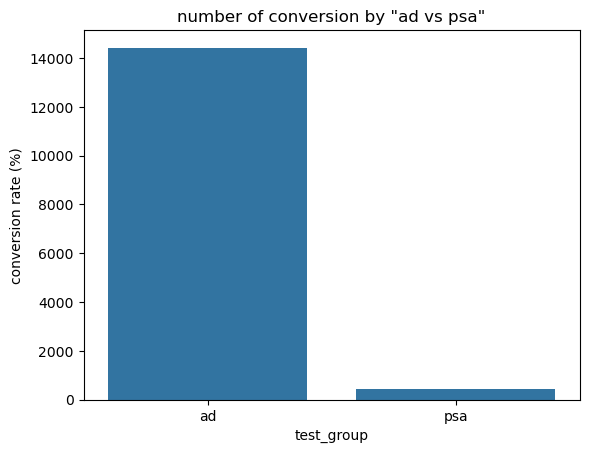

In [ ]:
sns.barplot(x=conversion.index, y = conversion.values)
plt.title('number of conversion by "ad vs psa"')
plt.ylabel('conversion rate (%)')
plt.show()

In [ ]:
#Rate of people converted by Ad and psa group
conversion_rate = df.groupby('test_group')['converted'].mean()*100
conversion_rate

test_group
ad     2.554656
psa    1.785411
Name: converted, dtype: float64

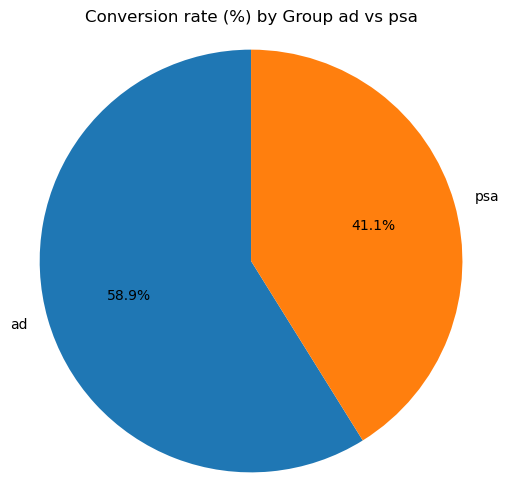

In [ ]:
# Create pie chart of rate of people converted by Ad and psa group
plt.figure(figsize=(6,6))
plt.pie(conversion_rate, labels=conversion_rate.index, autopct='%1.1f%%', startangle=90)
plt.title('Conversion rate (%) by Group ad vs psa')
plt.axis('equal')  # Makes the pie chart a circle
plt.show()

## 2. To Estimate the potential revenue generated from the ads.

In [ ]:
# Step 1: Filter only users in the 'ad' group who converted

conversions_from_ads = ad_group['converted'].sum()

# Step 2: Assume a value for average revenue per purchase
revenue_per_conversion = 200  # Adjust to your business case

# Step 3: Calculate total revenue from ads
total_revenue = conversions_from_ads * revenue_per_conversion

print(f"Conversions from Ads: {conversions_from_ads}")
print(f"Estimated Revenue: ₦{total_revenue:,}")

Conversions from Ads: 14423
Estimated Revenue: ₦2,884,600


## 3. Hypothesis Testing (A/B testing technique)

In [ ]:
# To count the total Audience bot where the converted is successful and not successfull
total_audience = df.groupby('test_group')['converted'].count()
total_audience

test_group
ad     564577
psa     23524
Name: converted, dtype: int64

In [ ]:
#This is where conversion is successfull
conversion

test_group
ad     14423
psa      420
Name: converted, dtype: int64

**SOLUTION**

My hypothesis is as follows:

**Null Hypothesis (H₀):** The ad had no successful impact on conversion (i.e., conversion rate did not change).

**Alternative Hypothesis (H₁):** The ad had a successful impact on conversion (i.e., conversion rate increased).


In [ ]:
z_score,p_value = proportions_ztest(count=conversion, nobs=total_audience)
print(f'Z-score: {z_score:.2f}')
print(f'P-value: {p_value:.4f}')

Z-score: 7.37
P-value: 0.0000


**Z-Score = 7.37 means this is a very high Z-score**
and A **p-value of 0.0000** means:
It is **extremely unlikely this happened by chance.**

##### Therefore
**I accept the Alternative hypothesis $H_1$**: that There is **strong statistical evidence** that the **ad had a significant and successful impact on conversion.**
i.e I reject the **null hypothesis** and accept the **alternative hypothesis.**

# THANKS